In [1]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

%matplotlib inline
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_colwidth', 200)

In [2]:
data=pd.read_csv('/Volumes/Data/Dropbox/ANIP/Encuesta de insercion 2016/20161231075312-SurveyExport.csv', encoding='utf-8-sig')

/usr/local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (77,80,85,86,92,102,132,135,150,151,155,160,208,213,214,223,224,233,234,236,239,266,267,268,269,273,278,279,286,287,288,289,292,295,301,302,306,313,315,316,323,324,325,326,331,332,333,337,338,339,340,350,353,361,364,366,369,371,376,381,382,386,387,391,392,396,397,401,402,406,411,412,416,417,421,422,426,427,431,432,437,443,444,449,452,457,465,466,467,497,498,500,501,502,503,504,505,506,508,509,510,511,512,513,517,518,522,532,542,552,559,562,569,570,585,586,587,591,593,596,643,647,648,657,658,660,661,662,664,683,684,695,696,700,702,704,706,708,722,729,731,736,737,746,747,752,753,754,756,757,758,765,766,789,790,797,798,799,800,806,808,813,819,820,821,822,824,826,835,839,840,841,845,846,849,850,852,857,861,862,867,868,869,870,871,874,879,880,881,882,889,892,893,902,908,909,920,921,934,935,938,939,940,943,944,946,947,949,950,952,955,956,958,959,961,964,966,967,970,974,976,977,980,981,983,984,

In [3]:
print(data.columns)

Index(['Response ID', 'Time Started', 'Date Submitted', 'Status', 'Contact ID',
       'Legacy Comments', 'Comments', 'Language', 'Referer',
       'Extended Referer',
       ...
       'Countries:Specify the countries, institutions and collaboration relationships',
       'Institutions and Organisations:Specify the countries, institutions and collaboration relationships',
       'Collaboration relationships:Specify the countries, institutions and collaboration relationships',
       'During your academic training and professional career, did you look forward to work in the academic field?',
       'Are you member of any researchers, professional or scientific association?',
       'Specify what associations you are a member of',
       'Are you interested in being contacted by the Asociación Nacional de Investigadores de Postgrado  (ANIP) and Redes Chilenas (ReCh)?',
       'Do you want to receive the results of this survey?', 'E-mail',
       'URL Redirect'],
      dtype='object', le

In [55]:
employment_cols = [col for col in data.columns if 'Cuánto tiempo tardó en encontrar empleo' in col]
age_cols = [col for col in data.columns if 'edad' in col]
njob_cols= [col for col in data.columns if 'Cuántos empleos' in col]
contract_cols = [col for col in data.columns if '¿Qué tipo de relación laboral tiene en este trabajo?/1' in col]
print('Estado del empleo: ', employment_cols)
print('Edad: ', age_cols)
print('Numero de trabajos: ', njob_cols)
print('Tipo de contrato: ', contract_cols)

Estado del empleo:  ['Una vez terminado el Magíster (MSc) y estando físicamente en Chile ¿Cuánto tiempo tardó en encontrar empleo vinculado a su especialización? Entiéndase que hacer un nuevo Postgrado o trabajar como Postdoctorado son considerados empleos./Magíster (MSc)', 'Una vez terminado el Doctorado (PhD) y estando físicamente en Chile ¿Cuánto tiempo tardó en encontrar empleo vinculado a su especialización? Entiéndase que hacer un nuevo Postgrado o trabajar como Postdoctorado son considerados empleos./Doctorado (PhD)', 'Una vez terminado el Postdoctorado y estando físicamente en Chile ¿Cuánto tiempo tardó en encontrar empleo vinculado a su especialización?\xa0Entiéndase que hacer un nuevo Postgrado o trabajar como Postdoctorado son considerados empleos.']
Edad:  ['¿Cuál es su edad? Exprésela en años', '¿Cuántos trabajos u obras tiene inscritos con propiedad intelectual?']
Numero de trabajos:  ['¿Cuántos empleos tiene en la actualidad? Incluya los empleos formales e informales.']


In [66]:
data.loc[:,'¿Cuántos empleos tiene en la actualidad? Incluya los empleos formales e informales.']=data['¿Cuántos empleos tiene en la actualidad? Incluya los empleos formales e informales.'].replace('5 o más','5').apply(pd.to_numeric)

data_complete=data[data['Status'].str.contains('Complete')]
data_complete_jobs=data_complete[data_complete['¿Cuántos empleos tiene en la actualidad? Incluya los empleos formales e informales.']>0]
data_complete.fillna('', inplace=True)

/usr/local/lib/python3.5/site-packages/pandas/core/frame.py:2824: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [67]:
data_complete['Status']

0       Complete
3       Complete
4       Complete
6       Complete
7       Complete
9       Complete
10      Complete
12      Complete
13      Complete
15      Complete
          ...   
1395    Complete
1396    Complete
1397    Complete
1398    Complete
1402    Complete
1403    Complete
1404    Complete
1406    Complete
1408    Complete
1412    Complete
Name: Status, dtype: object

In [68]:
data_complete['Una vez terminado el Doctorado (PhD) y estando físicamente en Chile ¿Cuánto tiempo tardó en encontrar empleo vinculado a su especialización? Entiéndase que hacer un nuevo Postgrado o trabajar como Postdoctorado son considerados empleos./Doctorado (PhD)']

0               Menos de 6 meses
3                               
4                               
6               Menos de 6 meses
7               Menos de 6 meses
9             No encontré empleo
10            No encontré empleo
12                              
13            No encontré empleo
15                              
                  ...           
1395    Entre 6 meses y 12 meses
1396                            
1397                            
1398                            
1402            Menos de 6 meses
1403                            
1404                            
1406                            
1408          No encontré empleo
1412                            
Name: Una vez terminado el Doctorado (PhD) y estando físicamente en Chile ¿Cuánto tiempo tardó en encontrar empleo vinculado a su especialización? Entiéndase que hacer un nuevo Postgrado o trabajar como Postdoctorado son considerados empleos./Doctorado (PhD), dtype: object

In [69]:
data_complete.loc[:,'¿Cuál es su edad? Exprésela en años'] = data_complete['¿Cuál es su edad? Exprésela en años'].apply(pd.to_numeric)
data_complete['¿Cuál es su edad? Exprésela en años']

/usr/local/lib/python3.5/site-packages/pandas/core/indexing.py:476: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


0       35.0
3       29.0
4       30.0
6       35.0
7       39.0
9       36.0
10      36.0
12      35.0
13      36.0
15      33.0
        ... 
1395    36.0
1396    29.0
1397    39.0
1398    30.0
1402    32.0
1403    37.0
1404    32.0
1406    28.0
1408    31.0
1412    31.0
Name: ¿Cuál es su edad? Exprésela en años, dtype: float64

In [73]:
for i in data_complete_jobs.index:
    text=data_complete_jobs.loc[i,'¿Qué tipo de relación laboral tiene en este trabajo?/1']
    soup = BeautifulSoup(text, "html.parser")
    for match in soup.findAll('span'):
        match.decompose()
    data_complete_jobs.loc[i,'¿Qué tipo de relación laboral tiene en este trabajo?/1']=soup.get_text()
    
data_complete_jobs['¿Qué tipo de relación laboral tiene en este trabajo?/1']

/usr/local/lib/python3.5/site-packages/pandas/core/indexing.py:476: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


0             Contrato de trabajo a plazo fijo
3                        Contrato a honorarios
4                           Acuerdo de palabra
6                        Contrato a honorarios
7       Contrato de trabajo a plazo indefinido
10            Contrato de trabajo a plazo fijo
12      Contrato de trabajo a plazo indefinido
15      Contrato de trabajo a plazo indefinido
16                       Contrato a honorarios
18                          Acuerdo de palabra
                         ...                  
1376                     Contrato a honorarios
1378                          Convenio de beca
1384                     Contrato a honorarios
1387    Contrato de trabajo a plazo indefinido
1388          Contrato de trabajo a plazo fijo
1395                Convenio de financiamiento
1398                          Convenio de beca
1402    Contrato de trabajo a plazo indefinido
1403                                      Otra
1404          Contrato de trabajo a plazo fijo
Name: ¿Qué ti

## Now the plots

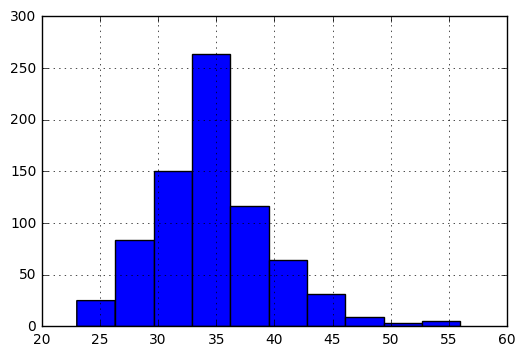

In [74]:
data_complete['¿Cuál es su edad? Exprésela en años'].hist()

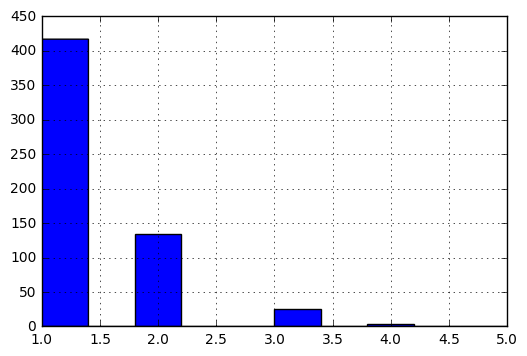

In [75]:
data_complete_jobs['¿Cuántos empleos tiene en la actualidad? Incluya los empleos formales e informales.'].hist()

In [76]:
data_complete_jobs.groupby(['¿Qué tipo de relación laboral tiene en este trabajo?/1']).size()

¿Qué tipo de relación laboral tiene en este trabajo?/1
Acuerdo de palabra                         16
Contrato a honorarios                     155
Contrato de trabajo a plazo fijo          138
Contrato de trabajo a plazo indefinido    142
Contrato de trabajo por obra                3
Convenio de beca                           42
Convenio de financiamiento                 49
Otra                                       21
Sin contrato                               15
dtype: int64

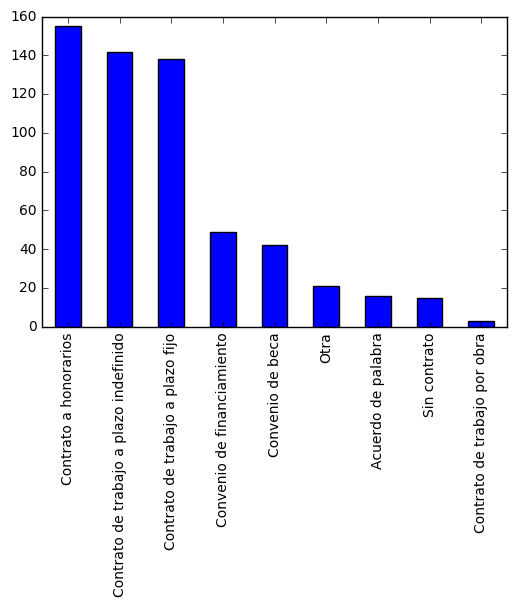

In [78]:
data_complete_jobs['¿Qué tipo de relación laboral tiene en este trabajo?/1'].value_counts().plot(kind='bar')

In [134]:
data_unemployed=data_complete[ (data_complete['Una vez terminado el Magíster (MSc) y estando físicamente en Chile ¿Cuánto tiempo tardó en encontrar empleo vinculado a su especialización? Entiéndase que hacer un nuevo Postgrado o trabajar como Postdoctorado son considerados empleos./Magíster (MSc)'].str.contains('No econtré empleo') | \
data_complete['Una vez terminado el Doctorado (PhD) y estando físicamente en Chile ¿Cuánto tiempo tardó en encontrar empleo vinculado a su especialización? Entiéndase que hacer un nuevo Postgrado o trabajar como Postdoctorado son considerados empleos./Doctorado (PhD)'].str.contains('No encontré empleo') | \
data_complete['Una vez terminado el Postdoctorado y estando físicamente en Chile ¿Cuánto tiempo tardó en encontrar empleo vinculado a su especialización?\xa0Entiéndase que hacer un nuevo Postgrado o trabajar como Postdoctorado son considerados empleos.'].str.contains('No encontré empleo')) ]

print('Numero de investigadores que se declaran desempleados: ', len(data_unemployed.index))
print('Numero de total de investigadores: ', len(data_complete.index))

Numero de investigadores que se declaran desempleados:  71
Numero de total de investigadores:  779


In [151]:
data_age=data_complete[ data_complete['¿Cuál es su edad? Exprésela en años'] < 30]

data_unemployed=data_age[ (data_age['Una vez terminado el Magíster (MSc) y estando físicamente en Chile ¿Cuánto tiempo tardó en encontrar empleo vinculado a su especialización? Entiéndase que hacer un nuevo Postgrado o trabajar como Postdoctorado son considerados empleos./Magíster (MSc)'].str.contains('No econtré empleo') | \
data_age['Una vez terminado el Doctorado (PhD) y estando físicamente en Chile ¿Cuánto tiempo tardó en encontrar empleo vinculado a su especialización? Entiéndase que hacer un nuevo Postgrado o trabajar como Postdoctorado son considerados empleos./Doctorado (PhD)'].str.contains('No encontré empleo') | \
data_age['Una vez terminado el Postdoctorado y estando físicamente en Chile ¿Cuánto tiempo tardó en encontrar empleo vinculado a su especialización?\xa0Entiéndase que hacer un nuevo Postgrado o trabajar como Postdoctorado son considerados empleos.'].str.contains('No encontré empleo')) ]

print('Numero de investigadores que se declaran desempleados: ', len(data_unemployed.index))
print('Numero de total de investigadores: ', len(data_age.index))
print('Porcentaje: ', np.round(len(data_unemployed.index)/len(data_age.index)*100.,1), '%')

Numero de investigadores que se declaran desempleados:  1
Numero de total de investigadores:  109
Porcentaje:  0.9 %


In [149]:
data_age=data_complete[ data_complete['¿Cuál es su edad? Exprésela en años'] < 35]

data_unemployed=data_age[ (data_age['Una vez terminado el Magíster (MSc) y estando físicamente en Chile ¿Cuánto tiempo tardó en encontrar empleo vinculado a su especialización? Entiéndase que hacer un nuevo Postgrado o trabajar como Postdoctorado son considerados empleos./Magíster (MSc)'].str.contains('No econtré empleo') | \
data_age['Una vez terminado el Doctorado (PhD) y estando físicamente en Chile ¿Cuánto tiempo tardó en encontrar empleo vinculado a su especialización? Entiéndase que hacer un nuevo Postgrado o trabajar como Postdoctorado son considerados empleos./Doctorado (PhD)'].str.contains('No encontré empleo') | \
data_age['Una vez terminado el Postdoctorado y estando físicamente en Chile ¿Cuánto tiempo tardó en encontrar empleo vinculado a su especialización?\xa0Entiéndase que hacer un nuevo Postgrado o trabajar como Postdoctorado son considerados empleos.'].str.contains('No encontré empleo')) ]

print('Numero de investigadores que se declaran desempleados: ', len(data_unemployed.index))
print('Numero de total de investigadores: ', len(data_age.index))
print('Porcentaje: ', np.round(len(data_unemployed.index)/len(data_age.index)*100.,1), '%')

Numero de investigadores que se declaran desempleados:  26
Numero de total de investigadores:  390
Porcentaje:  6.7 %


In [150]:
data_age=data_complete[ data_complete['¿Cuál es su edad? Exprésela en años'] < 40]

data_unemployed=data_age[ (data_age['Una vez terminado el Magíster (MSc) y estando físicamente en Chile ¿Cuánto tiempo tardó en encontrar empleo vinculado a su especialización? Entiéndase que hacer un nuevo Postgrado o trabajar como Postdoctorado son considerados empleos./Magíster (MSc)'].str.contains('No econtré empleo') | \
data_age['Una vez terminado el Doctorado (PhD) y estando físicamente en Chile ¿Cuánto tiempo tardó en encontrar empleo vinculado a su especialización? Entiéndase que hacer un nuevo Postgrado o trabajar como Postdoctorado son considerados empleos./Doctorado (PhD)'].str.contains('No encontré empleo') | \
data_age['Una vez terminado el Postdoctorado y estando físicamente en Chile ¿Cuánto tiempo tardó en encontrar empleo vinculado a su especialización?\xa0Entiéndase que hacer un nuevo Postgrado o trabajar como Postdoctorado son considerados empleos.'].str.contains('No encontré empleo')) ]

print('Numero de investigadores que se declaran desempleados: ', len(data_unemployed.index))
print('Numero de total de investigadores: ', len(data_age.index))
print('Porcentaje: ', np.round(len(data_unemployed.index)/len(data_age.index)*100.,1), '%')

Numero de investigadores que se declaran desempleados:  59
Numero de total de investigadores:  640
Porcentaje:  9.2 %
